In [1]:
# import your necessary libraries
import pandas as pd
import numpy as np

In [2]:
data = {
    "Name": ["John", "Jane", "Mike"],
    "Age": [25, 30, 35],
    "City": ["New York", "London", "Paris"]
}
df = pd.DataFrame(data)
print(df.index)

RangeIndex(start=0, stop=3, step=1)


In [3]:
df

,Name,Age,City
0,John,25,New York
1,Jane,30,London
2,Mike,35,Paris


In [11]:
# load from a file
# download the csv file from https://www.kaggle.com/datasets/camnugent/california-housing-prices/download?datasetVersionNumber=1
df = pd.read_csv("housing.csv")
df.shape

(20640, 10)

### Taking a Sample of Data
use the `DataFrame.sample` method 

In [15]:
indices = np.random.choice(df.index, size=100, replace=False)
df_subset = df.loc[indices]

In [16]:
# another way
df_subset_1 = df.sample(100)

### Applying Filters and Building Balanced Dataset

In [18]:
df.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [19]:
# use boolean conditions
condition1 = df["housing_median_age"] <= 30
condition2 = df["total_rooms"] >= 1000
df_filtered = df[condition1 & condition2]

In [21]:
df_filtered.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
75,-122.28,37.81,17.0,1237.0,462.0,762.0,439.0,0.9241,177500.0,NEAR BAY
77,-122.28,37.81,19.0,1207.0,243.0,721.0,207.0,1.1111,108300.0,NEAR BAY
78,-122.29,37.81,23.0,1745.0,374.0,1054.0,325.0,0.8026,112500.0,NEAR BAY
93,-122.27,37.79,27.0,1055.0,347.0,718.0,302.0,2.6354,187500.0,NEAR BAY


In [22]:
print(df.shape)
print(df_filtered.shape)

(20640, 10)
(10222, 10)


In [23]:
# groups within a column
df_filtered["ocean_proximity"].value_counts()

<1H OCEAN     4329
INLAND        4025
NEAR OCEAN    1288
NEAR BAY       579
ISLAND           1
Name: ocean_proximity, dtype: int64

In [25]:
toy_data = {
    "workclass": ["Private", "Self-emp", "Private", "Self-emp", "Private"],
    "sex_selfID": ["Male", "Female", None, "Male", "Female"],
    "age": [25,30,35,40,45]
}

In [27]:
df = pd.DataFrame(toy_data)

In [28]:
df

,workclass,sex_selfID,age
0,Private,Male,25
1,Self-emp,Female,30
2,Private,None,35
3,Self-emp,Male,40
4,Private,Female,45


In [29]:
df_filter = df[(df["workclass"]=="Private") & ~(df["sex_selfID"].isnull())]

In [30]:
df_filter

,workclass,sex_selfID,age
0,Private,Male,25
4,Private,Female,45


In [31]:
df["sex_selfID"].value_counts()

Male      2
Female    2
Name: sex_selfID, dtype: int64

In [34]:
toy_data = {"sex_selfID": ["Male","Female","Female","Female","Male","Female","Male"],
           "label": ["A","B","A","A","B","B","A"]}
df = pd.DataFrame(toy_data)
df.groupby(["sex_selfID", "label"]).size()

sex_selfID  label
Female      A        2
            B        2
Male        A        2
            B        1
dtype: int64

In [41]:
# modifying / merging labels
toy_data = {"workclass": ['Private', 'Self-emp', None, 'Private', 'Self-emp'],
           'age': [25,30,35,40,45]}
df = pd.DataFrame(toy_data)
columns_not_self_employed = df["workclass"] != "Self-emp"
columns_not_null = df["workclass"].notnull()

In [42]:
df

,workclass,age
0,Private,25
1,Self-emp,30
2,None,35
3,Private,40
4,Self-emp,45


In [36]:
columns_not_self_employed

0     True
1    False
2     True
3     True
4    False
Name: workclass, dtype: bool

In [37]:
columns_not_null

0     True
1     True
2    False
3     True
4     True
Name: workclass, dtype: bool

In [38]:
condition = columns_not_self_employed & columns_not_null

In [39]:
#  this is saying 
# for the column workclass
# if the entry is not null and it is not "Self-emp"
# modify this entry to "Not-self-emp"
df["workclass"] = np.where(condition, "Not-self-emp", df["workclass"])

In [40]:
df

,workclass,age
0,Not-self-emp,25
1,Self-emp,30
2,None,35
3,Not-self-emp,40
4,Self-emp,45


### Create Labels and Features: Clean and Convert Data

In [45]:
# convert a column to type int
df_house = pd.read_csv("housing.csv")
df_house.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [46]:
df_house["population"] = df_house["population"].astype(int)
df_house.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565,259.0,3.8462,342200.0,NEAR BAY


In [47]:
df_subset = df_house.sample(100)

In [48]:
# create new sample that doesn't include original sample
df_never_sampled = df_house.drop(labels=df_subset.index, axis=0, inplace=False)

In [49]:
df_never_sampled.shape

(20540, 10)

In [50]:
df_house.shape

(20640, 10)

In [51]:
df_house = df_house.drop(["longitude", "latitude"], axis=1)
df_house.head(5)

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,41.0,880.0,129.0,322,126.0,8.3252,452600.0,NEAR BAY
1,21.0,7099.0,1106.0,2401,1138.0,8.3014,358500.0,NEAR BAY
2,52.0,1467.0,190.0,496,177.0,7.2574,352100.0,NEAR BAY
3,52.0,1274.0,235.0,558,219.0,5.6431,341300.0,NEAR BAY
4,52.0,1627.0,280.0,565,259.0,3.8462,342200.0,NEAR BAY


### Order and Categorical Data

In [68]:
df_house = pd.read_csv("housing.csv")
df_house.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [69]:
df_house["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [70]:
# on the housing dataset
proximity_order = ["ISLAND", "NEAR OCEAN", "NEAR BAY", "<1H OCEAN", "INLAND"]
df_house["ocean_proximity"] = pd.Categorical(df_house["ocean_proximity"], ordered=True, categories=proximity_order)
df_house.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [74]:
df_house = df_house.sort_values('ocean_proximity').reset_index(drop=True)
df_house.head(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,ISLAND
1,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,ISLAND
2,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,ISLAND
3,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,ISLAND
4,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,ISLAND


### One-hot Encoding

In [75]:
df_binary = pd.get_dummies(df_house)
df_binary.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_ISLAND,ocean_proximity_NEAR OCEAN,ocean_proximity_NEAR BAY,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND
0,-118.48,33.43,29.0,716.0,214.0,422.0,173.0,2.6042,287500.0,1,0,0,0,0
1,-118.32,33.34,52.0,996.0,264.0,341.0,160.0,2.7361,450000.0,1,0,0,0,0
2,-118.32,33.33,52.0,2127.0,512.0,733.0,288.0,3.3906,300000.0,1,0,0,0,0
3,-118.33,33.34,52.0,2359.0,591.0,1100.0,431.0,2.8333,414700.0,1,0,0,0,0
4,-118.32,33.35,27.0,1675.0,521.0,744.0,331.0,2.1579,450000.0,1,0,0,0,0
5,-117.37,33.20,29.0,1315.0,311.0,1425.0,306.0,2.0272,99600.0,0,1,0,0,0
6,-117.34,33.23,11.0,3737.0,757.0,2212.0,727.0,3.1062,141000.0,0,1,0,0,0
7,-117.33,33.23,15.0,2919.0,592.0,1130.0,579.0,2.5872,155600.0,0,1,0,0,0
8,-117.33,33.23,15.0,1905.0,416.0,1258.0,388.0,3.3300,127900.0,0,1,0,0,0
9,-117.33,33.24,13.0,4543.0,881.0,2298.0,870.0,2.9386,143400.0,0,1,0,0,0


## Simple Data Exploration

In [80]:
df_summ = df_house.describe()
df_summ

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [82]:
df_summ.shape

(8, 9)

In [83]:
df_summ.loc["std"].idxmax()

'median_house_value'

In [86]:
df_summ.idxmax(axis=1)["std"]

'median_house_value'

In [87]:
np.any(df_summ.loc["min"] < 0)

True

### Simple Visualization

In [89]:
# simple visualization
!pip install seaborn
import seaborn as sns


[notice] A new release of pip available: 22.3 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


<AxesSubplot:xlabel='total_rooms', ylabel='Count'>

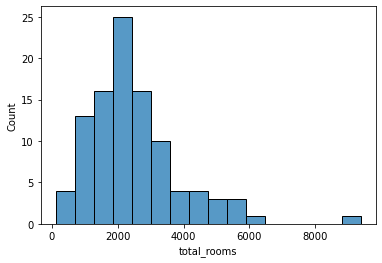

In [90]:
sns.histplot(data=df_subset, x="total_rooms")

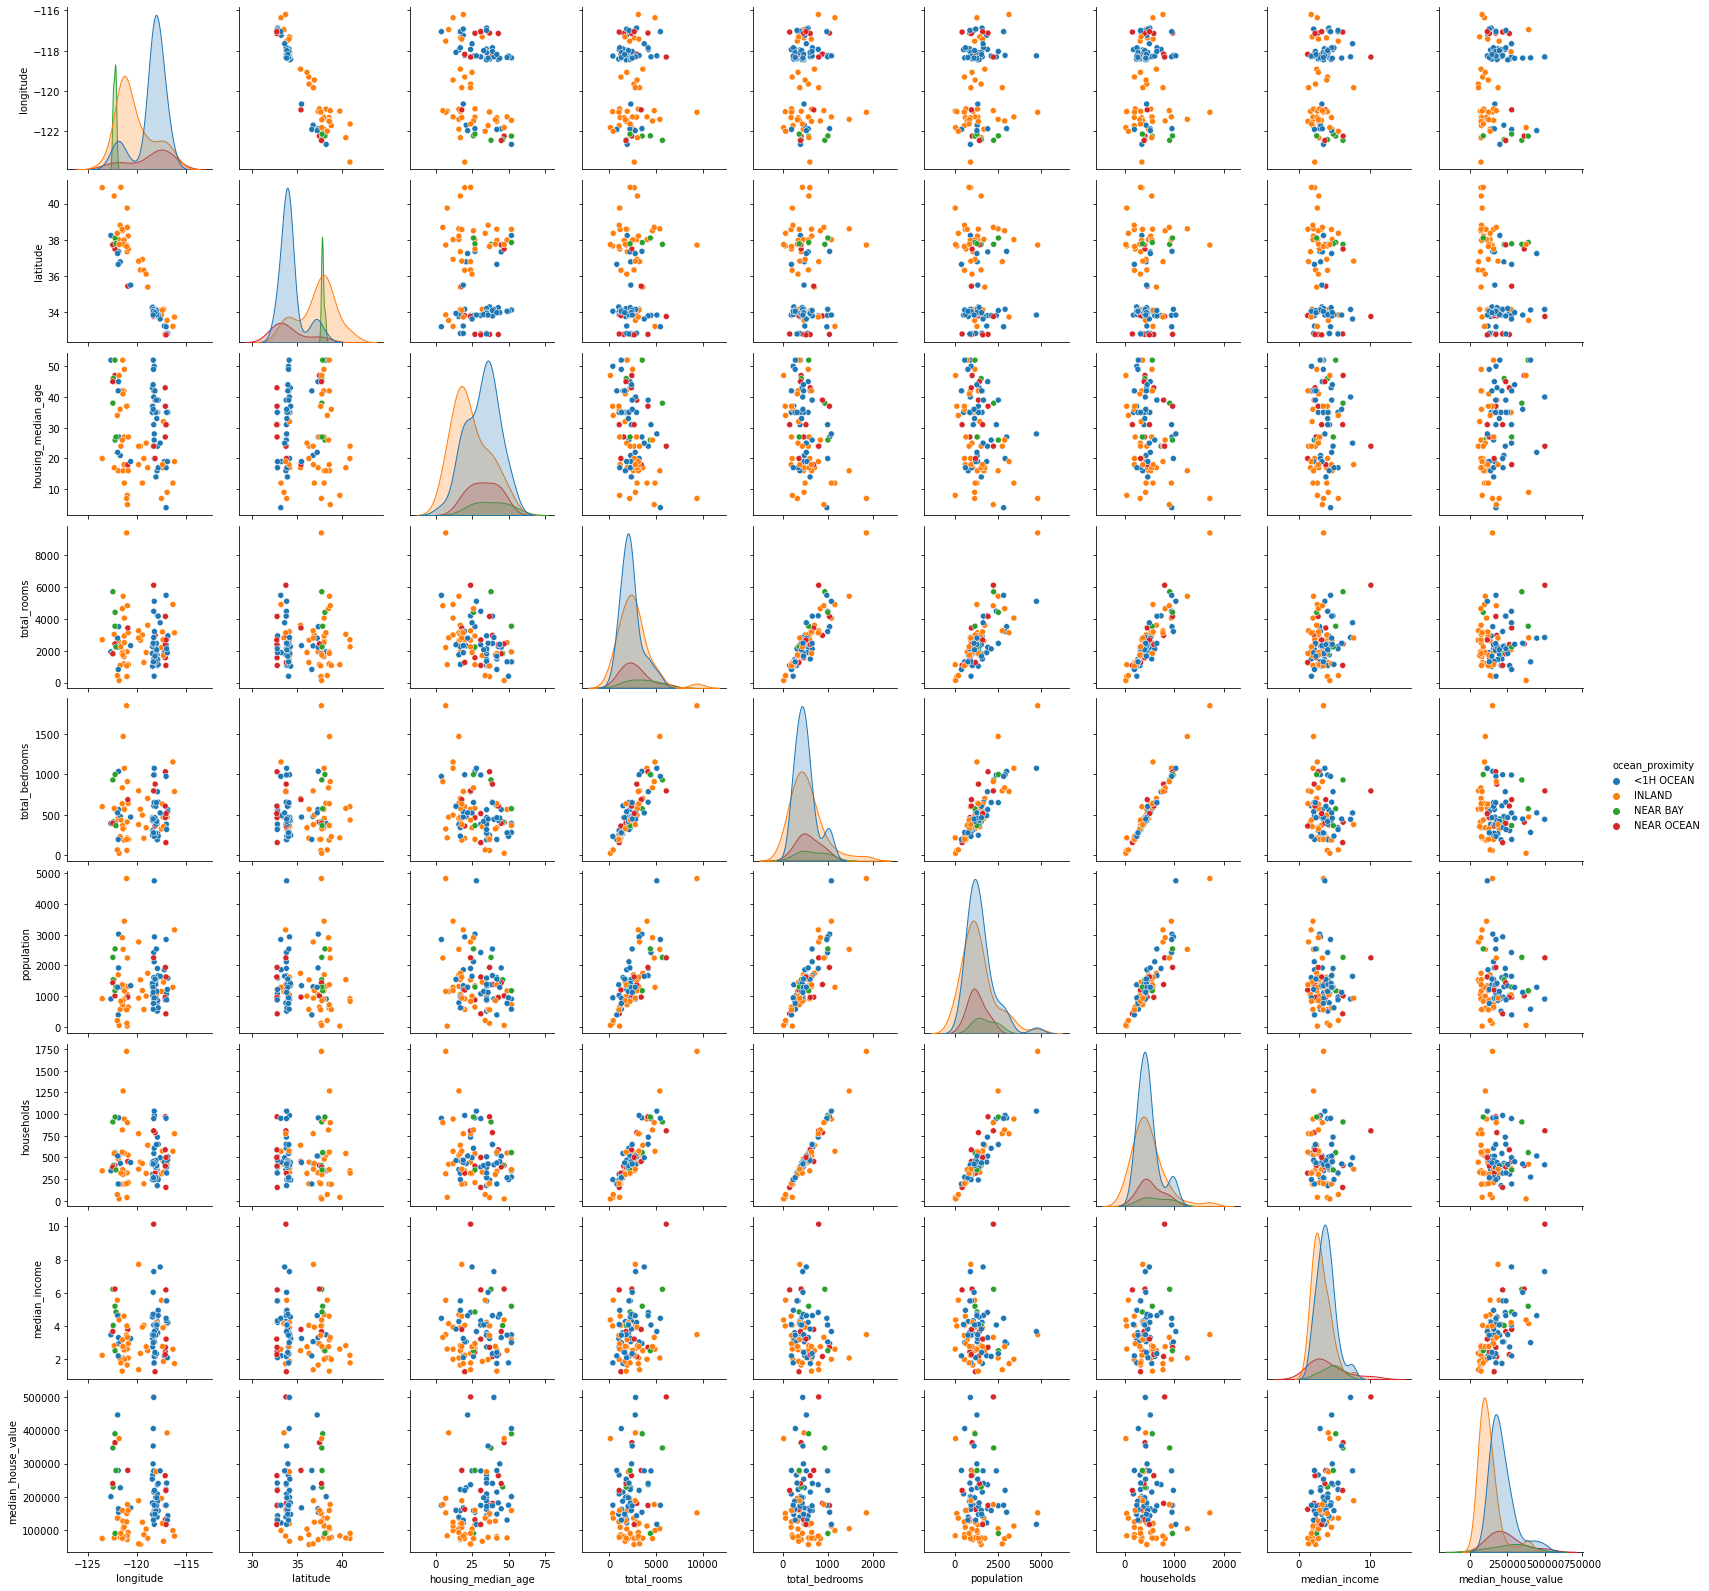

In [91]:
sns.pairplot(data=df_subset, hue="ocean_proximity")

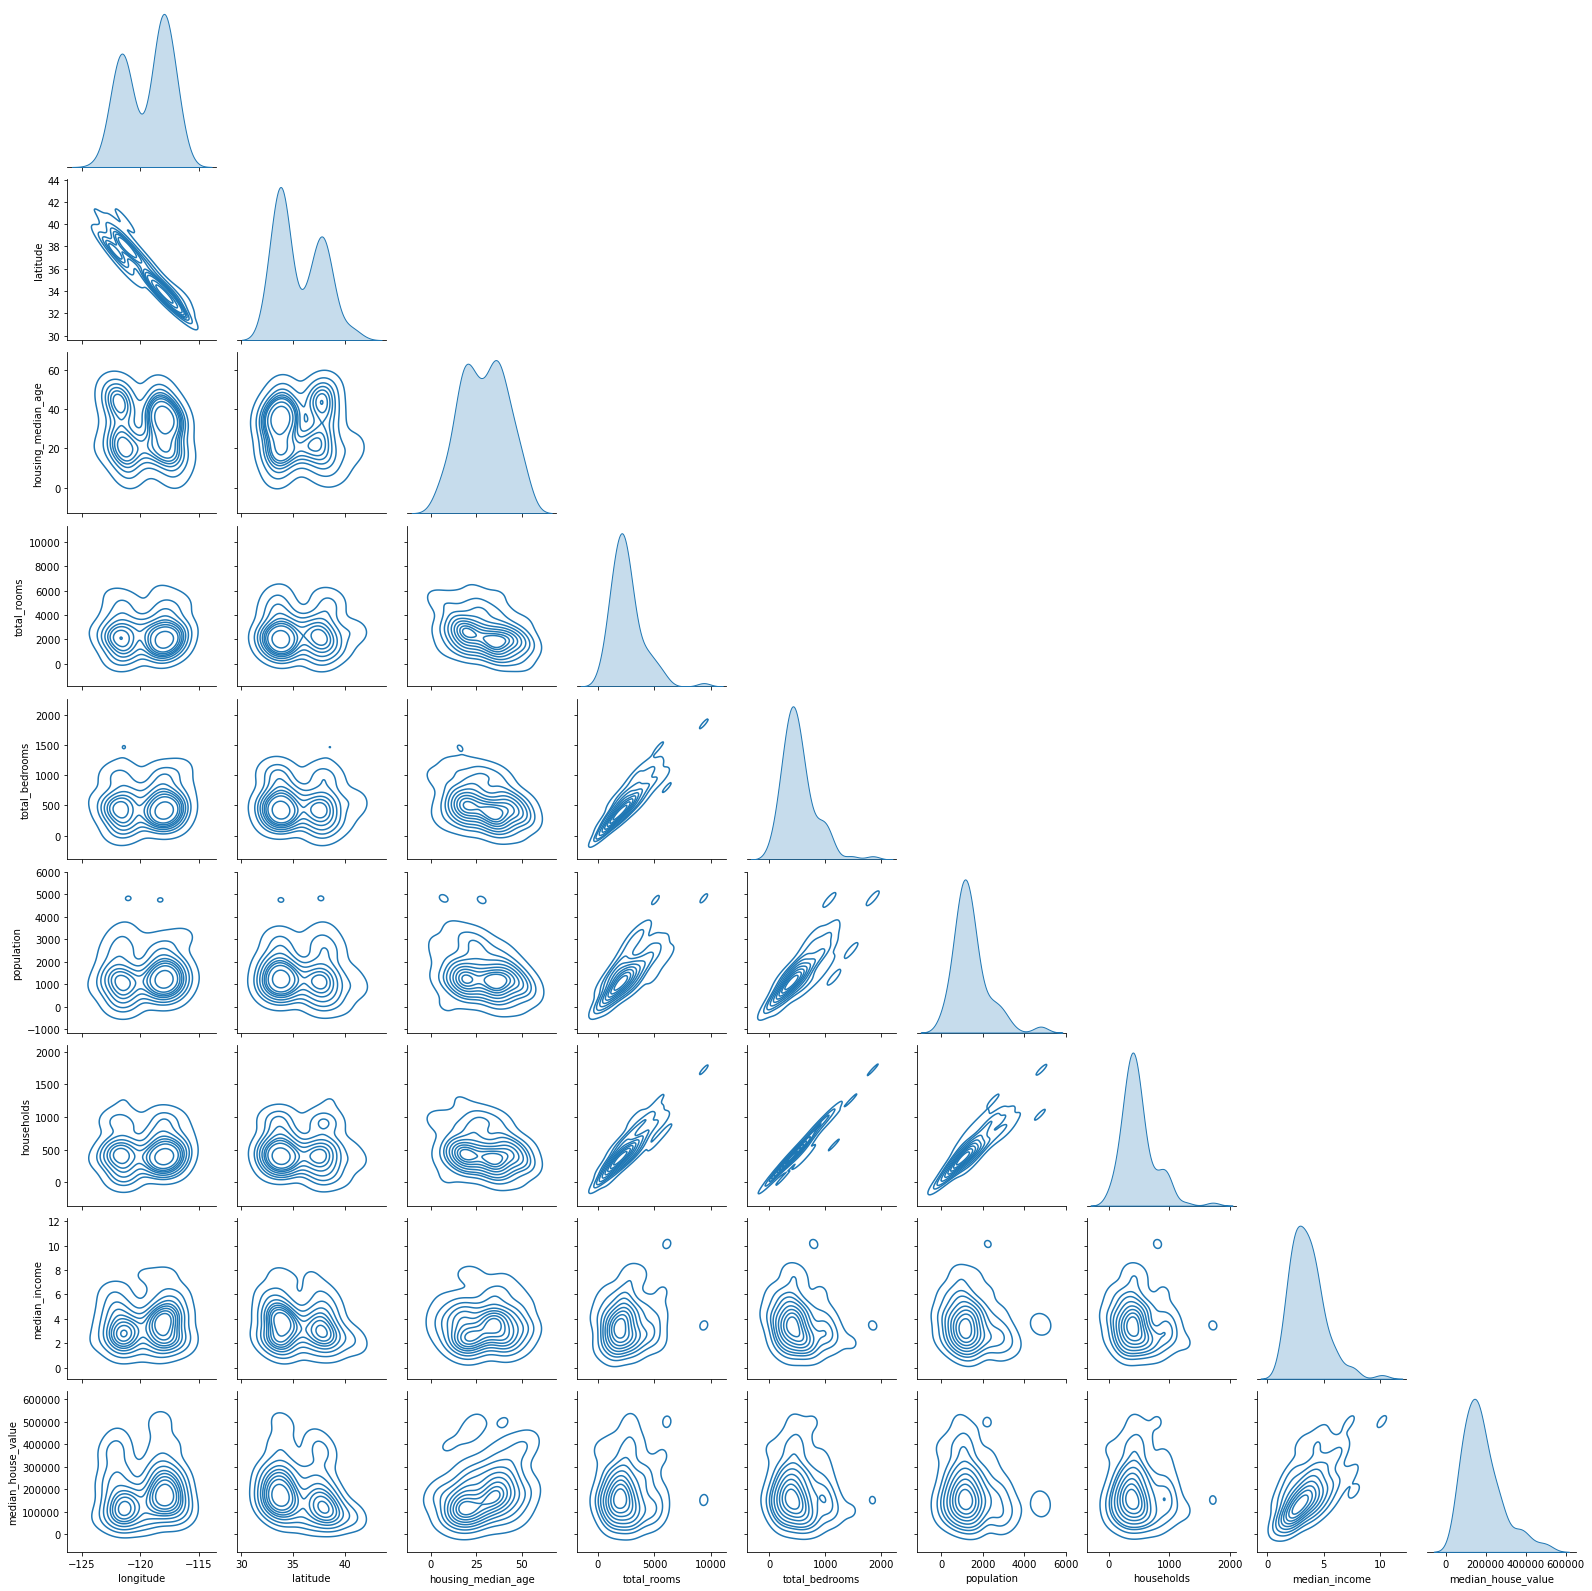

In [92]:
sns.pairplot(data=df_subset, kind='kde', corner=True) # kde density estimator type plot 

In [94]:
# can set fiture size beforehand 
import matplotlib.pyplot as plt 

<AxesSubplot:xlabel='total_rooms', ylabel='Count'>

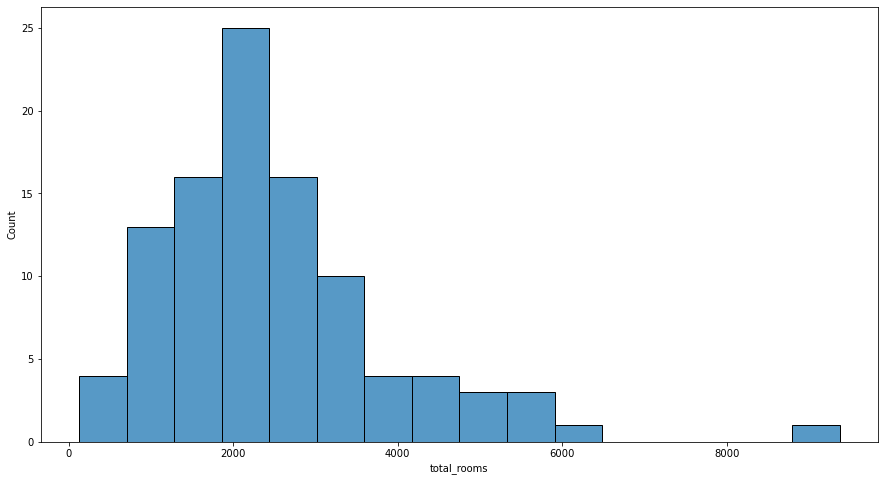

In [95]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_subset, x="total_rooms")

<AxesSubplot:xlabel='total_rooms', ylabel='Count'>

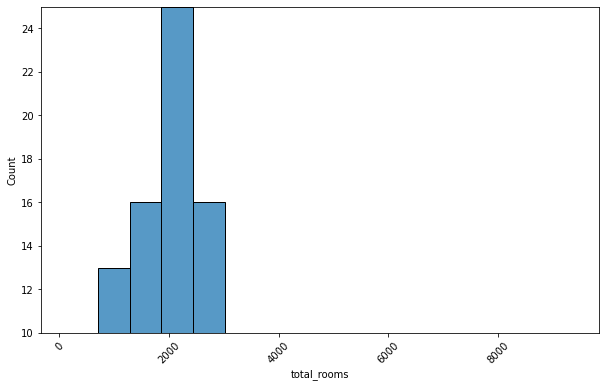

In [96]:
plt.figure(figsize=(10,6))
plt.ylim(10,25)
plt.xticks(rotation=45)
sns.histplot(data=df_subset, x="total_rooms")

In [99]:
df_house.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

### Correlation

In [101]:
# explore correlation 
df_subset.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.936920,-0.124899,-0.014922,-0.003790,0.051268,0.002521,0.093975,0.061384
latitude,-0.936920,1.000000,-0.026833,0.030249,0.017146,-0.054962,-0.010051,-0.184707,-0.249638
housing_median_age,-0.124899,-0.026833,1.000000,-0.395877,-0.351004,-0.302587,-0.285220,0.011186,0.292469
total_rooms,-0.014922,0.030249,-0.395877,1.000000,0.905442,0.786744,0.900701,0.170272,0.072300
total_bedrooms,-0.003790,0.017146,-0.351004,0.905442,1.000000,0.853179,0.969857,-0.148325,-0.090828
population,0.051268,-0.054962,-0.302587,0.786744,0.853179,1.000000,0.901889,-0.116093,-0.129460
households,0.002521,-0.010051,-0.285220,0.900701,0.969857,0.901889,1.000000,-0.085114,-0.033169
median_income,0.093975,-0.184707,0.011186,0.170272,-0.148325,-0.116093,-0.085114,1.000000,0.636937
median_house_value,0.061384,-0.249638,0.292469,0.072300,-0.090828,-0.129460,-0.033169,0.636937,1.000000


In [110]:
df_subset.corr()["median_house_value"].drop(["median_house_value"], axis=0)

longitude             0.061384
latitude             -0.249638
housing_median_age    0.292469
total_rooms           0.072300
total_bedrooms       -0.090828
population           -0.129460
households           -0.033169
median_income         0.636937
Name: median_house_value, dtype: float64

In [112]:
corrs_sorted = df_subset.corr()["median_house_value"].drop(["median_house_value"], axis=0).sort_values(ascending=False)
corrs_sorted

median_income         0.636937
housing_median_age    0.292469
total_rooms           0.072300
longitude             0.061384
households           -0.033169
total_bedrooms       -0.090828
population           -0.129460
latitude             -0.249638
Name: median_house_value, dtype: float64

In [113]:
col_names = corrs_sorted.index

In [114]:
col_names

Index(['median_income', 'housing_median_age', 'total_rooms', 'longitude',
       'households', 'total_bedrooms', 'population', 'latitude'],
      dtype='object')

### Outliers


In [119]:
val = np.percentile(df_house["median_house_value"], 99) # top 1 percentile

In [120]:
val

500001.0

In [122]:
import scipy.stats as stats 
# replace lower and top 1% with values at 1% and 99% respectively 
df_house["median_house_value"] = stats.mstats.winsorize(df_house["median_house_value"], limits=[0.01,0.01])

In [125]:
# zscore 
zscores = stats.zscore(df_house["median_house_value"])

In [126]:
zscores

0        0.698864
1        2.108269
2        0.807280
3        1.802103
4        2.108269
           ...   
20635   -1.291650
20636   -1.144204
20637   -1.019309
20638   -1.171092
20639   -1.019309
Name: median_house_value, Length: 20640, dtype: float64

In [127]:
# replace missing values 
df_house.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


In [128]:
df_house.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [129]:
nan_count = np.sum(df_house.isnull())

In [130]:
nan_count

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [132]:
mean_bedrooms=df_house['total_bedrooms'].mean()
df_house['total_bedrooms'].fillna(value=mean_bedrooms, inplace=True)

In [133]:
nan_count = np.sum(df_house.isnull())
nan_count

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64